# Importing The Libraries

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fn4qIiLJnIqJTyeUCkXQbHHgQUZGT459_NYK5yy7BKNO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmit-donotdelete-pr-1urmdj96cadb5e'
object_key = 'Admission_Predict1.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

# Analyze The Data

In [3]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [6]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# Handling Missing Values

In [8]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Visualization

Univariate Analysis

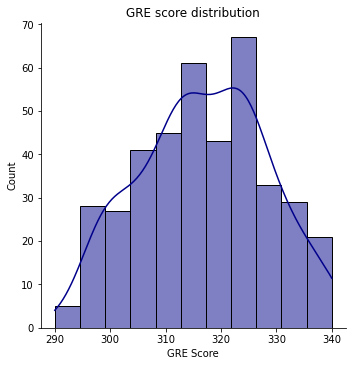

In [10]:
sns.displot(x=df["GRE Score"], kde=True, color='Darkblue')
plt.title("GRE score distribution");

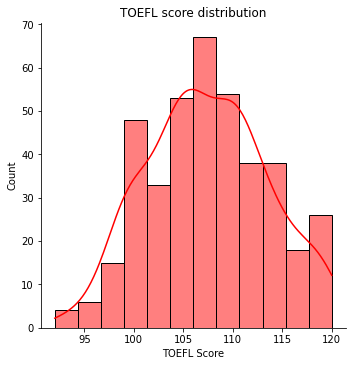

In [11]:
sns.displot(x=df["TOEFL Score"], kde=True, color='Red')
plt.title("TOEFL score distribution");

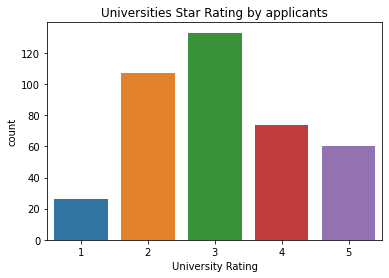

In [12]:
sns.countplot(x=df["University Rating"]);
plt.title("Universities Star Rating by applicants");

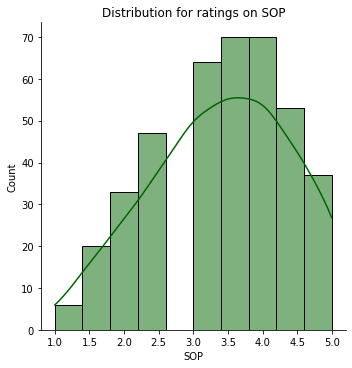

In [13]:
sns.displot(x=df["SOP"], kde=True, color='darkgreen');
plt.title("Distribution for ratings on SOP");

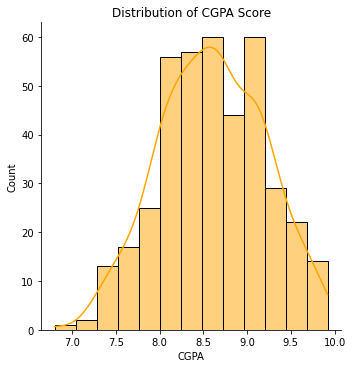

In [14]:
sns.displot(x=df["CGPA"], kde=True, color='orange');
plt.title("Distribution of CGPA Score");

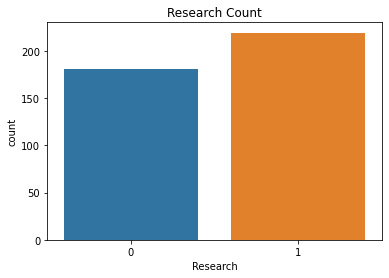

In [15]:
sns.countplot(x=df["Research"]);
plt.title("Research Count");

Bivariate Analysis

In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

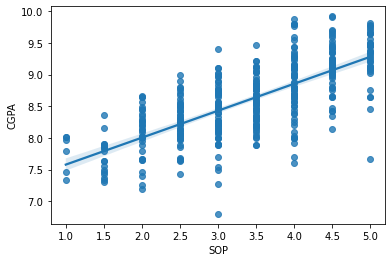

In [17]:
sns.regplot(x='SOP', y='CGPA', data=df)

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

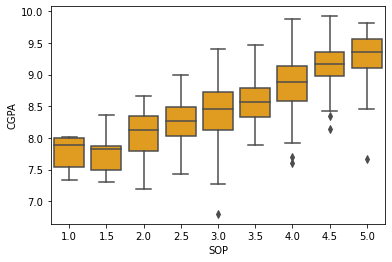

In [18]:
sns.boxplot(x='SOP',y='CGPA',data=df,color='orange')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

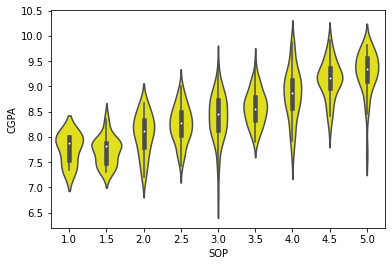

In [19]:
sns.violinplot(x='SOP',y='CGPA',data=df,color='yellow')

<AxesSubplot:xlabel='SOP', ylabel='CGPA'>

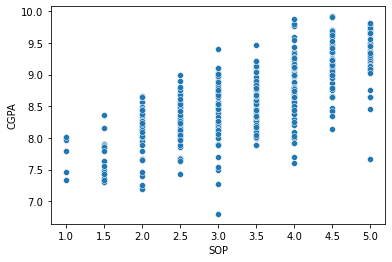

In [20]:
sns.scatterplot(x='SOP', y='CGPA', data=df)

Multi-Variate Analysis

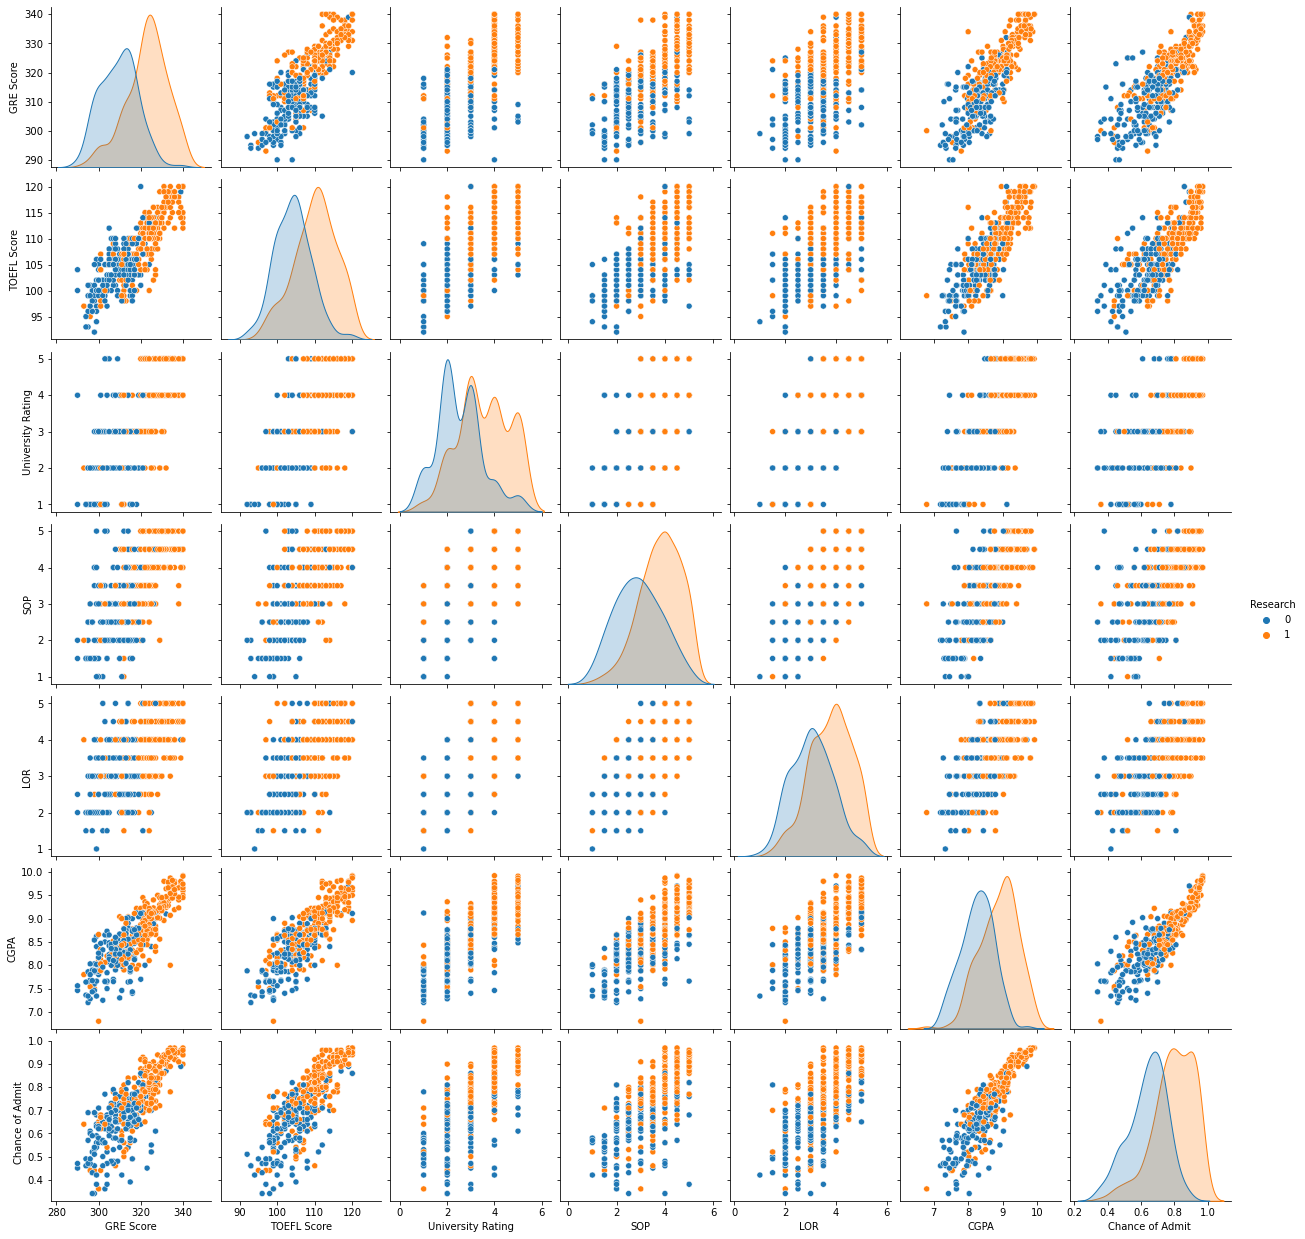

In [21]:
sns.pairplot(df,hue='Research')

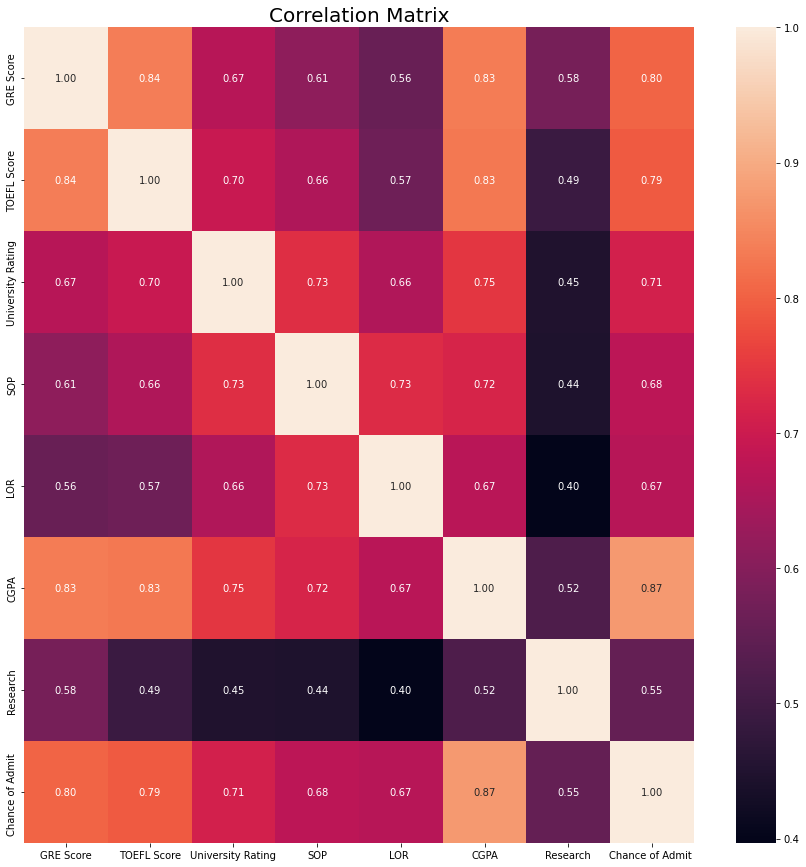

In [22]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

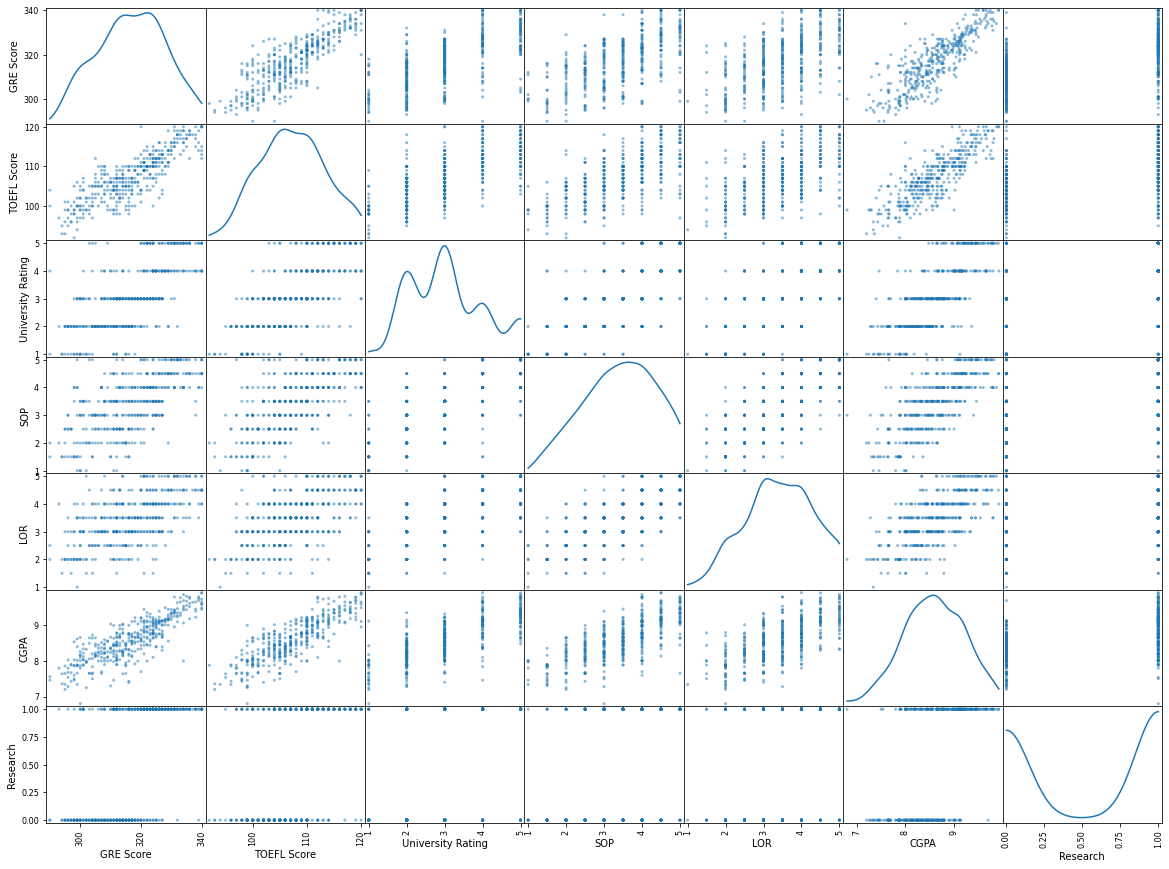

In [23]:
pd.plotting.scatter_matrix(df.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

# Splitting Dependent And Independent Columns

In [24]:
x = df.iloc[:,0:7]
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]

In [25]:
x.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [26]:
y = df.iloc[:,7:]
y

Chance of Admit 
0                0.92
1                0.76
2                0.72
3                0.80
4                0.65
..                ...
395              0.82
396              0.84
397              0.91
398              0.67
399              0.95

[400 rows x 1 columns]

In [27]:
y.head()

Chance of Admit 
0              0.92
1              0.76
2              0.72
3              0.80
4              0.65

In [28]:
x.shape

(400, 7)

In [29]:
y.shape

(400, 1)

In [30]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [31]:
print(f'y contains: {y.shape}')

y contains: (400, 1)


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [33]:
x.head()

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  Research
0       0.94     0.928571               0.75  0.875  0.875  0.913462       1.0
1       0.68     0.535714               0.75  0.750  0.875  0.663462       1.0
2       0.52     0.428571               0.50  0.500  0.625  0.384615       1.0
3       0.64     0.642857               0.50  0.625  0.375  0.599359       1.0
4       0.48     0.392857               0.25  0.250  0.500  0.451923       0.0

# Splitting The Data Into Train And Test

In [34]:
X=df.drop(['Chance of Admit '],axis=1) #input data_set
y=df['Chance of Admit '] #output labels

In [35]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [36]:
x_train

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
157       0.38     0.428571               0.25  0.250  0.375  0.467949   
356       0.74     0.607143               0.50  0.625  0.750  0.631410   
338       0.66     0.571429               1.00  0.750  0.750  0.621795   
75        0.78     0.785714               0.25  0.250  0.750  0.564103   
307       0.70     0.714286               0.75  0.750  0.750  0.705128   
..         ...          ...                ...    ...    ...       ...   
125       0.20     0.285714               0.50  0.250  0.500  0.596154   
156       0.50     0.464286               0.50  0.250  0.375  0.493590   
143       1.00     1.000000               0.75  0.875  0.750  1.000000   
390       0.48     0.357143               0.25  0.250  0.375  0.461538   
23        0.88     0.964286               1.00  1.000  0.875  0.929487   

     Research  
157       0.0  
356       1.0  
338       1.0  
75        1.0  
307       1.0  
..        ...  
125       1.0  
156       0.0  
143       1.0  
390       0.0  
23        1.0  

[340 rows x 7 columns]

In [37]:
x_train.shape

(340, 7)

In [38]:
y_train

157    0.65
356    0.79
338    0.81
75     0.72
307    0.80
       ... 
125    0.64
156    0.70
143    0.97
390    0.64
23     0.95
Name: Chance of Admit , Length: 340, dtype: float64

In [39]:
y_train.shape

(340,)

In [40]:
x_test

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
369       0.22     0.214286               0.00  0.250  0.500  0.394231   
64        0.70     0.678571               0.50  0.500  0.625  0.608974   
199       0.46     0.535714               0.50  0.750  0.875  0.605769   
238       0.40     0.428571               0.50  0.250  0.625  0.503205   
270       0.32     0.464286               0.25  0.375  0.500  0.455128   
234       0.80     0.750000               1.00  1.000  0.750  0.804487   
372       0.92     0.964286               0.75  0.875  0.750  0.903846   
60        0.38     0.285714               0.25  0.500  0.500  0.416667   
28        0.10     0.035714               0.00  0.250  0.250  0.128205   
111       0.62     0.607143               0.75  0.750  0.750  0.602564   
214       0.82     0.892857               0.75  0.875  1.000  0.839744   
102       0.48     0.500000               0.25  0.750  0.625  0.464744   
355       0.54     0.500000               0.25  0.250  0.625  0.423077   
164       0.78     0.678571               0.75  0.875  0.750  0.708333   
332       0.36     0.500000               0.50  0.625  0.375  0.451923   
66        0.74     0.785714               0.50  0.500  0.500  0.711538   
129       0.86     0.928571               1.00  1.000  1.000  0.817308   
291       0.20     0.357143               0.25  0.125  0.250  0.342949   
341       0.72     0.642857               0.50  0.625  0.625  0.628205   
53        0.68     0.714286               0.75  0.750  0.375  0.416667   
251       0.52     0.250000               0.25  0.375  0.500  0.705128   
169       0.42     0.250000               0.25  0.375  0.500  0.378205   
346       0.28     0.178571               0.25  0.125  0.250  0.269231   
121       0.88     0.964286               1.00  0.875  0.875  0.858974   
97        0.82     1.000000               0.50  0.750  0.750  0.692308   
114       0.42     0.464286               0.50  0.625  0.500  0.528846   
378       0.26     0.214286               0.00  0.250  0.375  0.272436   
241       0.54     0.392857               0.25  0.375  0.250  0.432692   
254       0.62     0.785714               0.75  0.750  1.000  0.743590   
368       0.16     0.000000               0.00  0.250  0.250  0.346154   
321       0.66     0.428571               0.50  0.750  0.750  0.525641   
276       0.78     0.750000               1.00  1.000  0.875  0.849359   
17        0.58     0.500000               0.50  0.750  0.500  0.384615   
362       0.96     0.821429               1.00  0.875  1.000  0.778846   
322       0.48     0.535714               0.25  0.375  0.750  0.471154   
141       0.84     0.928571               0.25  0.875  0.625  0.820513   
264       0.70     0.642857               0.25  0.500  0.375  0.628205   
20        0.44     0.535714               0.50  0.500  0.250  0.352564   
61        0.34     0.321429               0.50  0.750  0.500  0.448718   
146       0.50     0.464286               0.50  0.250  0.375  0.538462   
286       0.92     0.928571               1.00  0.875  0.750  0.766026   
360       0.64     0.642857               0.50  0.750  1.000  0.589744   
45        0.64     0.642857               1.00  1.000  0.750  0.737179   
265       0.46     0.357143               0.50  0.375  0.375  0.602564   
280       0.42     0.357143               0.50  0.875  0.750  0.589744   
193       0.92     0.928571               1.00  0.875  1.000  0.875000   
57        0.16     0.250000               0.25  0.750  0.250  0.256410   
29        0.40     0.250000               0.25  0.125  0.250  0.160256   
283       0.62     0.678571               0.50  0.375  0.500  0.673077   
243       0.70     0.785714               0.50  0.625  0.500  0.717949   
0         0.94     0.928571               0.75  0.875  0.875  0.913462   
174       0.62     0.678571               0.75  0.750  0.750  0.695513   
231       0.58     0.500000               0.50  0.625  0.375  0.490385   
25       

In [41]:
x_test.shape

(60, 7)

In [42]:
y_test

369    0.67
64     0.52
199    0.72
238    0.70
270    0.72
234    0.91
372    0.95
60     0.48
28     0.46
111    0.69
214    0.94
102    0.62
355    0.73
164    0.81
332    0.75
66     0.61
129    0.92
291    0.56
341    0.79
53     0.72
251    0.70
169    0.65
346    0.47
121    0.94
97     0.86
114    0.59
378    0.56
241    0.65
254    0.85
368    0.51
321    0.73
276    0.89
17     0.65
362    0.91
322    0.72
141    0.90
264    0.75
20     0.64
61     0.47
146    0.75
286    0.92
360    0.85
45     0.88
265    0.71
280    0.68
193    0.94
57     0.46
29     0.54
283    0.80
243    0.76
0      0.92
174    0.87
231    0.74
25     0.94
106    0.87
175    0.85
187    0.93
19     0.62
210    0.79
109    0.68
Name: Chance of Admit , dtype: float64

In [43]:
y_test.shape

(60,)

# Training And Testing The Model

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [45]:
model.score(x_test,y_test)

0.7700721036315137

In [46]:
y_predict=model.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04556751446248574
Mean Squared Error: 0.004829629076334043
Root Mean Squared Error: 0.06949553277969774


In [48]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

Logistic Regression

In [49]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(x_train, y_train)

In [50]:
y_pred = lr.predict(x_test)

# Model Evaluation

In [51]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score: %f' %(accuracy_score(y_test, y_pred) * 100))  
print('Recall Score: %f' %(recall_score(y_test, y_pred) * 100))  
print('ROC AUC Score: %f' %(roc_auc_score(y_test, y_pred) * 100))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 93.333333
Recall Score: 100.000000
ROC AUC Score: 60.000000
Confussion Matrix:
 [[ 1  4]
 [ 0 55]]


# Save The Model

In [84]:
import pickle

In [85]:
pickle.dump(lr,open('university.pkl','wb'))

In [86]:
model = pickle.load(open('university.pkl','rb'))

In [126]:
from ibm_watson_machine_learning import APIClient
import json

In [127]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey" : "vA4bt-VwXZJcOP-GLLlS32qxT8bc3enp69Ya0sJNdcm6"
    
}

In [128]:
wml_client = APIClient(wml_credentials)

In [129]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
11666748-0441-406d-b9d7-2ad35fb8d43e  model  2022-11-11T10:03:51.569Z
------------------------------------  -----  ------------------------


In [130]:
SPACE_ID="11666748-0441-406d-b9d7-2ad35fb8d43e"

In [131]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [132]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [133]:
import sklearn
sklearn.__version__

'1.0.2'

In [135]:
MODEL_NAME = 'model'
DEPLOYMENT_NAME = 'model'
DEMO_MODEL = model

In [136]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [137]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [138]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [139]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'float64'},
      {'name': 'TOEFL Score', 'type': 'float64'},
      {'name': 'University Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T10:44:24.157Z',
  'id': '7c8db04b-d1ca-4ece-bf9a-fb04053171be',
  'modified_at': '2022-11-11T10:44:26.689Z',
  'name': 'model',
  'owner': 'IBMid-666002LZ7B',
  'resource_key': '86c907b8-c0f4-46a8-8640-3042c07e3a54',
  'space_id': '11666748-0441-406d-b9d7-2ad35fb8d43e'},
 'system': {'warnings': []}}

In [143]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'7c8db04b-d1ca-4ece-bf9a-fb04053171be'

In [144]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [145]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '7c8db04b-d1ca-4ece-bf9a-fb04053171be' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4088d249-458c-4e79-9fa4-415a57255018'
------------------------------------------------------------------------------------------------


